In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# How NFL Pass Defenses Can Learn From Poker Players

Yes, Poker.  Hang with me.

The passing game in the NFL is based upon a set of constantly evolving, highly exploitative strategies.  Coaches, players and staff spend a significant amount of time reviewing game film looking for opportunities that could influence the results of the game.  Each week becomes an evolving game-plan of tactics to take advantages of any real or preceived weaknesses in the their opponents games while also leaning on their own strengths while attempting to disguise their intentions.

As a life-long NFL fan, but someone who is never been involved in any formalized football, I spent well over 100 hours watching videos of players and coaches reviewing game film and discussing what did and didn't work, what were the reasoning behind the strategies.  While it makes perfect sense, the film review process had been completely opaque to me, so I was surprised to hear things like:
* "I know from years of experience of having him defend me, when he jams me at the line with his left hand, he's planning on using his inside leverage to drive me to the sideline in man coverage, and we had a plan for just such an occassion."
* "Almost every team has a similar pattern that they run from this formation, so I knew that if I keyed in on if the running back either was blocking or releasing, I could make a play on the ball."
* "Since they were in one-high coverage, I knew that as soon as the safety committed to one of the receivers that entered into that zone, the other would be open.  He bit on the first, so I threw the long ball on the corner and it worked."

As I watched this, I began to worry that any analytics that I applied to these problems would be inheritenly wrong, as I had zero visibility into the why each team did what they did.

At about the same time as this was going on, there was also a high-stakes poker match going on between Daniel Negranu and Doug Polk.  Daniel is an old-school poker player who has made tens of millions of dollars in his career by being really good and reading people and exploting weaknesses in other player games.  He's probably best known for his uncanny ability to know the exact two cards his texas holdem opponent is holding.  

Doug on the other hand grew up in the era of online poker.  He was one of the early pioneers of what has become known as GTO or Game Theory Optimal Poker.  Doug realized that no matter what cards his opponents has, he has a higher long term "expected value" from understanding the math behind every possible hand and scenario and making the correct call (bet, raise, fold) soley on the math.  

These two are both considered near the top of their respective niches of poker and they both really don't like each other.  So it surprised the poker community when Daniel accepted Doug's offer for a $200/$400 online heads-up challenge consisting of 25,000 hands.  

As I took a break from watching film and waited for machine learning models to train, I would occassionaly check in on the progress of their match.  As of this submission, they are through slightly more than half of the pre-determined hands, and Doug (the math guy) is up $748,000. Most of the matches haven't even been close.

So it made me think: **What if there is an opportunity to take the math concepts that have revolutionalized the game of poker and apply them to pass defense?**  This submission is the result of that process.

# Key Findings

* I have created a neural network model that can accurately predict defensive coverages with zero feature engineering
* The top pass defenses in the league or more consistent and take less risks.  While this approach limits their downside, it also limits their upside.
* Cover 2 Zone is the most volitle/risky coverage type, but also has the greatest potential upsde.  Cover 4 Zone is the most conservative coverage
* The top pass defenses exhibit a significant edge when it comes to their their execution of Cover 0 Man and Cover 2 Man
* There is near parity in the how well the best pass defenses execute Cover 2 Zone and Cover 1 Man vs the rest of the league
* There is almost no difference between the percentage of time the top pass defenses deploy each coverage compared to the rest of the league

# A Novel Method For Classifying Pass Defenses at 97% Accuracy

I'm not going to lie, this was a singificant struggle.  I tried for over two months to find a classifer that could get a reasonable level of accuracy with absolutely no-luck.  It didn't seem to matter which model-type that I used, which features I engineered or how much I tuned the hyper-paramters, I could not get anything over 70%.  I eventually abandoned all of these
* Random Forrest
* Class Balanced Random Forrest
* Bootstrapped Random Forrest
* Easy Ensemble
* GaussianNB
* K-Nearest Neigbors
* Support Vector Machine

But one day I was looking the the play animations that several people had in their notebooks and it gave me an idea to try a Convolutional Neural Network and to convert the player tracking data to "images".  With a CNN I was able to pass 80% accuracy, but I was then stuck.  I tried:
* One image per frame
* One single image per play (with every frame composited)
* As a "movie", where I would use a ConvLTSM network

I was able to gain some meaningful improvements in accuracy by injecting different tracking data into what would traditional be the pixel colors (RGB).  I eventually landed on using the team of the player, the 'o' orientation variable and the 'dir' direction variable.

I was then struck by the idea of doing what I call "time laps images".  The idea is that I would use each frame as an image, but I would composite all the previous frames "under it".  With this approach I was able to get to an ~85% accuracy.

The next big came when I moved from a CNN that I had created and was tuning to a publicly available one (ResNet50).  While the loss values always started really high( it's a really deep network), I was able to get to 94% accuracy.

The final piece came from tuning which frames were included in the composted images.  Frames 14-52 determined the optimal frames.

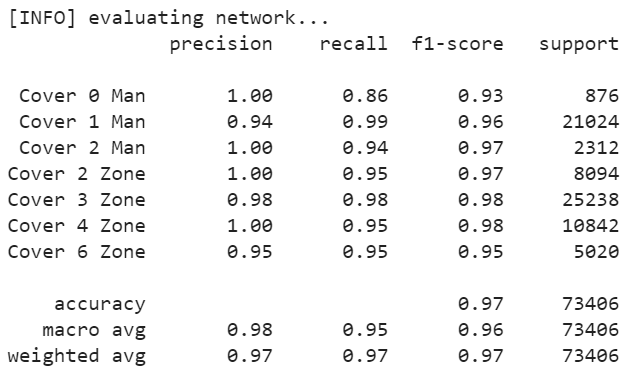

# Coverage Risk vs. Reward

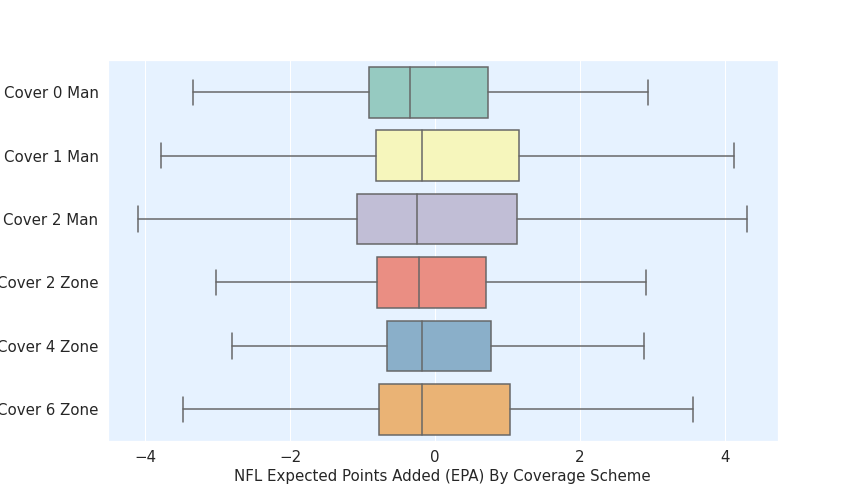

Once I was able to classify each pass coverage, I was able to start to analyze how well each performed.  Unfortunately I used up most of my time on creating the model and had very little time to analyze the data.

The above box chart shows the performance of each given pass coverage, for every team over the course of the 2018 season.

* While I don't using EPA as a defensive metric (there are so many other factors to a defensive performance), I didn't have the cycles to engineer new features and I felt that it should be directional/relational enough to provide meaningful insights.
* I use the quartiles of the box-plot as an indicator of both consistency (the size of the box: smaller is more consistent) and volatilty/risk (the length of the whiskers)
* Consistancy from highest->lowest: Cover 4 Zone, Cover 2 Zone, Cover 0 Man, Cover 6 Zone, Cover 1 Man, Cover 2 Man
* Volatilty from lowest->highest: Cover 2 Man, Cover 1 Man, Cover 6 Zone, Cover 0 Man, Cover 2 Zone, Cover 4 Zone


Why are these metrics important?

I think it is important to know how much risk is associated with a specific play so that teams that are managing a tight lead might want to make a different call than those who need to take some risks in an effort to get their defenses back on the field.

# What Do The Best Defenses Do Differently?

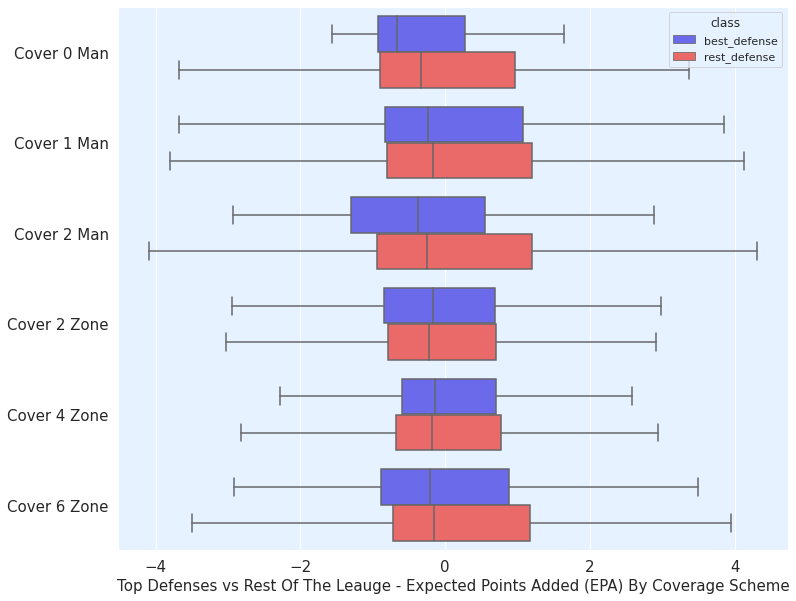

When it comes to classifying who the best defenses are, I really felt that EPA and WPA were accurate enough measures.  Holding the defense to a low EPA might be important, or it might not depending on the context of the situation within the game.

So instead I decided to use the Defense-Adjusted Variance Over Average (DVOA) metrics from Football Outisders.  I took their pass defenesive stats (which could more accurately be defined as Offense-Adjusted, but that is for another time).  I took the top 25% (8 teams) in Pass Defense DVOA and compared them to the rest of the league and found some interesting findings:

* The top pass defenses are much better (at both consistency and results) at Cover 0 Man than the rest of the league
* There is also a meaningful difference to how those top defenses execute on Cover 2 Man coverage

While I didn't have the time to dig deeper in this area, the obvious next step would be to determine if you could determine what factors contribute to those findings.  Is it the skill or athletic ability of the players on the field?  Is it how well they execute the coverages?  I think the results would be very eye opening.



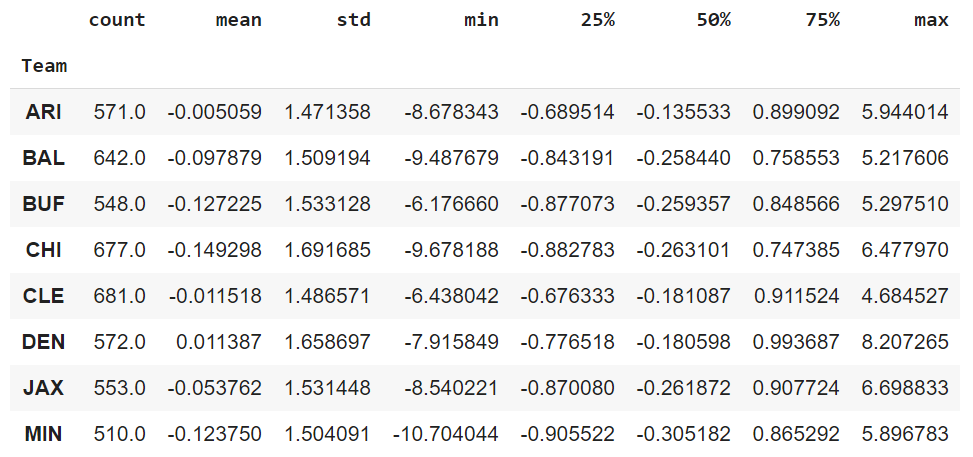

# Future Work

Man, I have so much left to do.  With all of the work I've done over the past few months, here are some of the things that I wish that I would have had time to accomplish:
* Idenetifying how well each pass coverage does against various receiver formations.  I was able to classify each formation using the on-field tracking data, but was left without enough time to analayze
* Looking at what makes the best pass offenses in the league outperform everyone else and then to further extend that to the QB


# Summary

Obviously I would have liked to have had more time to analyze the data once my model was complete.  I feel like the application of Game Theory and proabilities could have a significant an meaningful impact on the passing game in NFL.  Not that I believe that the NFL will every truly leave a highly exploitative approach to the passing game, I feel the edge situations that could call for one of two different coverages, the math could provide a nudge one way or another.

Doug Polk often uses a random number generator to determine what he should do on a specific hand.  I don't see defensive coordinators getting there in my lifetime, but I think it would be fascinating to nudge the game in that direction over time to see how much it could improve.

And I honestly hopes that someone reading this sees the work and agrees that I should be a part of the team ;)

I was unable to submit this with my code in the appendix as the runtime was too long.  I deleted it from here, but it can be found here:

* All Generated Files: https://drive.google.com/drive/folders/1ohAFAl0VMi7IVAT9l9oKZv3uoqukrvFR?usp=sharing
* Pre-Processing and Feature Engineering: https://colab.research.google.com/drive/1xTa1S8qDrxngApJDOSCq782A6QbNctBY?usp=sharing
* Building The Neural Network: https://colab.research.google.com/drive/1t3XPUJg6i_P-9knb9TcbHeNNKV74iczT?usp=sharing
* Classifying Defensive Coverages: https://colab.research.google.com/drive/1toGpAHib61mtq4vIhj3z28XzK8sBk5ja?usp=sharing
* Best Defense/DVOA: https://colab.research.google.com/drive/1ZD9O_YtwIsPuxlW_a-Aac5f8rP5slwOG?usp=sharing
* Identifying Formations with Player Tracking: https://colab.research.google.com/drive/1aSIWzxdAZldGBO-m_jHPHp14yXLDV9FE?usp=sharing
